# TP02a - Arthur Carlos de Faria - 0040421

Projeto e simulação de filtros analógicos.

**Instruções:**
- Use a versão Python 3.x
- Evite sempre usar usar laços `for` e `while`, fazer contas no formato vetorial é sempre mais rápido.
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.

**Objetivos**
- Realizar o projeto de filtros analógicos
- Analisar resposta em frequência do filtro projetado

## Projeto de filtros

Nesta atividade você fará a implementação de filtros analógicos.

### Especificações e filtro protótipo
Projete um filtro analógico passa-altas que satisfaça as seguintes especificações:
- $A_p = 0,2~\mathrm{dB}$
- $A_r = 50~\mathrm{dB}$
- $\Omega_{r} = 400~\mathrm{Hz}$
- $\Omega_{p} = 440~\mathrm{Hz}$

Obtenha o filtro protótipo (normalizado) que satisfaça as especificações acima. Na célula abaixo, mostre a resposta em frequência (módulo e fase) desse filtro protótipo. Mostre as aproximações de Butterworth, Chebyshev (tipo 1 e tipo 2) e Elíptico **no mesmo gráfico**. Mostre também a constelação de polos e zeros de cada aproximação (use as mesmas cores para um mesmo tipo de filtro).

Ordem do filtro buttord:  77
Frequência de ressonância: 2710.3008810623446 hz
Ordem do filtro chebchev1:  18
Frequência de ressonância: 2764.601535159018 hz
Ordem do filtro chebchev2:  18
Frequência de ressonância: 2513.6919648681824 hz
Ordem do filtro Elliptico:  8
Frequência de ressonância: 2764.601535159018 hz
______LEGENDA_______
|Azul: Butteworth   |
|Verde: Chebchev1   |
|Vermelho: Chebchev2|
|Amarelo: Eliptico  |
|___________________|


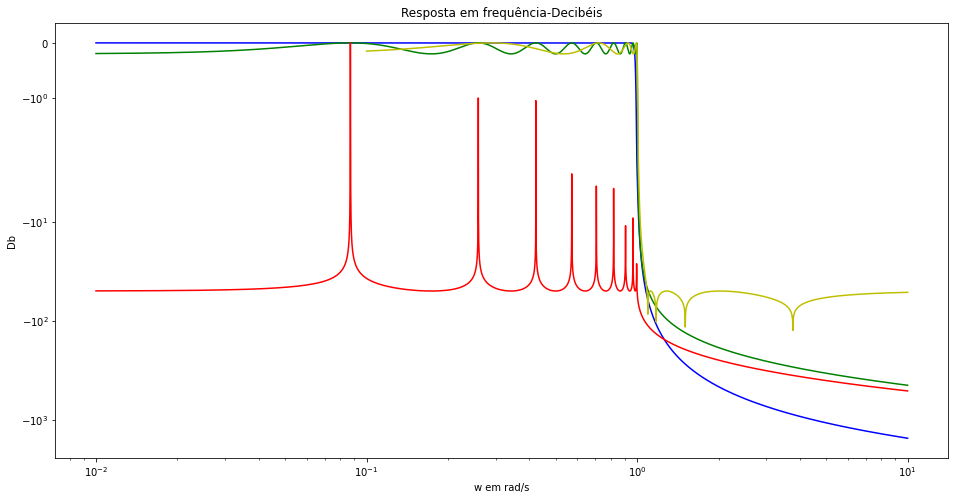

______LEGENDA_______
|Azul: Butteworth   |
|Verde: Chebchev1   |
|Vermelho: Chebchev2|
|Amarelo: Eliptico  |
|___________________|


C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


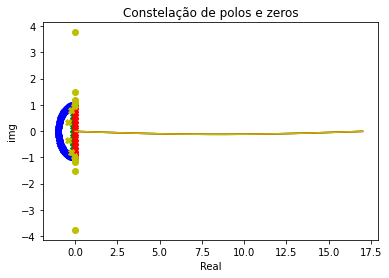

<Figure size 720x360 with 0 Axes>

In [4]:
### SEU CÓDIGO COMEÇA AQUI ###

import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
            #parametros do filtro
Ap=0.2  #atenuação Máxima na banda de passagem   
Ar=50   #atenuação mínima na banda de passagem
wr=400*2*np.pi  #frequencia de atenuaçãp
wp=440*2*np.pi  #frequencia de passagem
                    #example:

                    #Lowpass: wp = 400, wr = 440
                    #Highpass: wp = 440, wr = 400
                    #Bandpass: wp = [400, 440], wr = [0.1, 0.6]
                    #Bandstop: wp = [0.1, 0.6], wr = [0.2, 0.5]
                    
#especificação do tipo de filtro
N,Wn      = signal.buttord(wp, wr, Ap, Ar,analog=True)
N1,Wn1    = signal.cheb1ord(wp, wr, Ap, Ar,analog=True)
N2,Wn2    = signal.cheb2ord(wp, wr, Ap, Ar,analog=True)
N3,Wn3    = signal.ellipord(wp, wr, Ap, Ar,analog=True)
print("Ordem do filtro buttord: ", N)
print("Frequência de ressonância:", Wn,"hz")

print("Ordem do filtro chebchev1: ", N1)
print("Frequência de ressonância:", Wn1,"hz")

print("Ordem do filtro chebchev2: ", N2)
print("Frequência de ressonância:", Wn2,"hz")

print("Ordem do filtro Elliptico: ", N3)
print("Frequência de ressonância:", Wn3,"hz")

z,p,k=signal.buttap(N)
z1,p1,k1=signal.cheb1ap(N1,Ap)
z2,p2,k2=signal.cheb1ap(N2,Ar)
z3,p3,k3=signal.ellipap(N3,Ap,Ar)

filtroButternormalizado=signal.lti(z,p,k)
filtrocheby1normalizado=signal.lti(z1,p1,k1)
filtrocheby2normalizado=signal.lti(z2,p2,k2)
filtroellipnormalizado=signal.lti(z3,p3,k3)

w,H  = signal.freqresp(filtroButternormalizado)
w1,H1= signal.freqresp(filtrocheby1normalizado)
w2,H2= signal.freqresp(filtrocheby2normalizado)
w3,H3= signal.freqresp(filtroellipnormalizado)

plt.figure(figsize=(16,8))
plt.xscale('log')
plt.yscale('symlog')#  {"linear", "log", "symlog", "logit", ...}
plt.ylabel('Db')
plt.xlabel('w em rad/s')
print("______LEGENDA_______")
print("|Azul: Butteworth   |")
print("|Verde: Chebchev1   |")
print("|Vermelho: Chebchev2|")
print("|Amarelo: Eliptico  |")
print("|___________________|")
plt.title("Resposta em frequência-Decibéis")
plt.plot(w,20*np.log10(np.abs(H)),c='b')
plt.plot(w1,20*np.log10(np.abs(H1)),c='g')
plt.plot(w2,20*np.log10(np.abs(H2)),c='r')
plt.plot(w3,20*np.log10(np.abs(H3)),c='y')
plt.show()
print("______LEGENDA_______")
print("|Azul: Butteworth   |")
print("|Verde: Chebchev1   |")
print("|Vermelho: Chebchev2|")
print("|Amarelo: Eliptico  |")
print("|___________________|")
plt.title("Constelação de polos e zeros")
plt.xlabel("Real")
plt.ylabel("img")
plt.plot(np.real(z),np.imag(z),"o",c='b')
plt.plot(np.real(p),np.imag(p),"X",c='b')

plt.plot(np.real(z1),np.imag(z1),"o",c='g')
plt.plot(np.real(p1),np.imag(p1),"X",p1,c='g')

plt.plot(np.real(z2),np.imag(z2),"o",c='r')
plt.plot(np.real(p2),np.imag(p2),"X",p1,c='r')

plt.plot(np.real(z3),np.imag(z3),"o",c='y')
plt.plot(np.real(p3),np.imag(p3),"X",p1,c='y')
plt.figure(figsize=(10,5))

plt.show()

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico de resposta em frequência (módulo e fase) com resposta dos filtros **protótipos** (normalizados) que atendem às especificações. Cada gráfico deve conter quatro curvas, correspondente às aproximações de Butterworth, Chebyshev tipo 1, Chebyshev tipo 2 e Elíptico.
2. Constelação de polos e zeros dos filtros protótipos normalizados, com cores iguais para sistemas iguais e cores diferentes para filtros diferentes.
___

### Filtro "desnormalizado"
Abaixo, obtenha quatro funções de transferências "desnormalizadas", uma para cada aproximação (Butterworth, Chebyshev tipo 1, Chebyshev tipo 2 e Elíptico). **Num mesmo gráfico**, mostre as respostas em frequências dos filtros obtidos com o respectivo gabarito das especificações. Mostre também a constelação de polos e zeros dos filtros obtidos.

______LEGENDA_______
|Azul: Butteworth   |
|Verde: Chebchev1   |
|Vermelho: Chebchev2|
|Amarelo: Eliptico  |
|___________________|


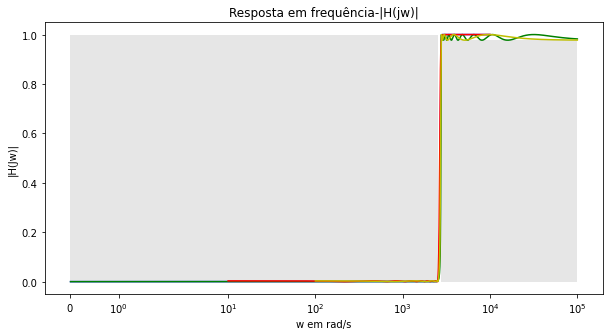

______LEGENDA_______
|Azul: Butteworth   |
|Verde: Chebchev1   |
|Vermelho: Chebchev2|
|Amarelo: Eliptico  |
|___________________|


<ipython-input-5-1b1070d295ae>:67: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w,20*np.log10(np.abs(H)),c='b')


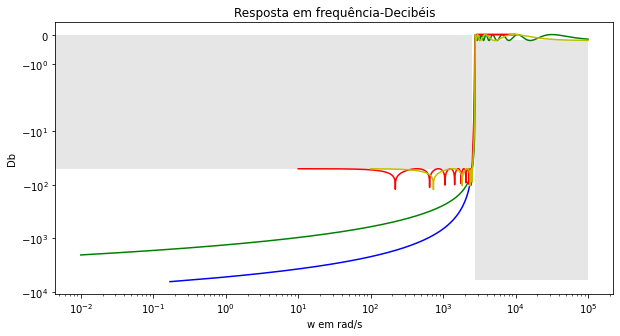

______LEGENDA_______
|Azul: Butteworth   |
|Verde: Chebchev1   |
|Vermelho: Chebchev2|
|Amarelo: Eliptico  |
|___________________|


C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Anaconda\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


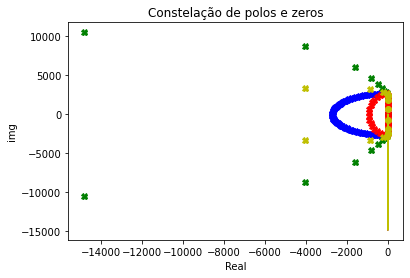

<Figure size 720x360 with 0 Axes>

In [5]:
### SEU CÓDIGO COMEÇA AQUI ###
#Obtendo a aproximação do filtro
z,  p, k  = signal.butter(N, Wn, 'hp', True,'zpk')
z1,  p1, k1 = signal.cheby1(N1,Ap, Wn1, 'hp', True,'zpk')
z2,  p2, k2 = signal.cheby2(N2,Ar, Wn2, 'hp', True,'zpk')
z3,  p3, k3 = signal.ellip(N3,Ap,Ar, Wn3, 'hp', True,'zpk')

#Obtendo a função de transferencia do filtro
filtroButter=signal.lti(z,p,k)
filtrocheby1=signal.lti(z1,p1,k1)
filtrocheby2=signal.lti(z2,p2,k2)
filtroellip=signal.lti(z3,p3,k3)

w,H  = signal.freqresp(filtroButter)
w1,H1= signal.freqresp(filtrocheby1)
w2,H2= signal.freqresp(filtrocheby2)
w3,H3= signal.freqresp(filtroellip)



# w,mag,phase=signal.bode(filtroButter)
# w1,mag1,phase1=signal.bode(filtrocheby1)
# w2,mag2,phase2=signal.bode(filtrocheby2)
# w3,mag3,phase3=signal.bode(filtroellip)

# b	azul
# g	verde
# r	vermelho
# c	ciano
# m	magenta
# y	amarelo
# k	preto
# w	branco
plt.figure(figsize=(10,5))

plt.xscale("symlog")
plt.ylabel('|H(Jw)|')
plt.xlabel('w em rad/s')

print("______LEGENDA_______")
print("|Azul: Butteworth   |")
print("|Verde: Chebchev1   |")
print("|Vermelho: Chebchev2|")
print("|Amarelo: Eliptico  |")
print("|___________________|")
plt.title("Resposta em frequência-|H(jw)|")
plt.plot(w,np.abs(H),c='b')
plt.plot(w1,np.abs(H1),c='g')
plt.plot(w2,np.abs(H2),c='r')
plt.plot(w3,np.abs(H3),c='y')
plt.fill([0,  wr,  wr,   0], [10**(-Ar/20), 10**(-Ar/20), 1, 1], '0.9', lw=0)
plt.fill([wp,  10**5,  10**5,   wp], [0, 0, 10**(-Ap/20), 10**(-Ap/20)], '0.9', lw=0)
plt.show()

plt.figure(figsize=(10,5))
plt.xscale('log')
plt.yscale('symlog')#  {"linear", "log", "symlog", "logit", ...}
plt.ylabel('Db')
plt.xlabel('w em rad/s')
print("______LEGENDA_______")
print("|Azul: Butteworth   |")
print("|Verde: Chebchev1   |")
print("|Vermelho: Chebchev2|")
print("|Amarelo: Eliptico  |")
print("|___________________|")
plt.title("Resposta em frequência-Decibéis")
plt.plot(w,20*np.log10(np.abs(H)),c='b')
plt.plot(w1,20*np.log10(np.abs(H1)),c='g')
plt.plot(w2,20*np.log10(np.abs(H2)),c='r')
plt.plot(w3,20*np.log10(np.abs(H3)),c='y')
plt.fill([0,  wr,  wr, 0], [-Ar, -Ar, 0, 0], '0.9', lw=0)
plt.fill([wp,  10**5,  10**5,   wp], [-6*1000, -6*1000, -Ap, -Ap], '0.9', lw=0)
plt.show()

print("______LEGENDA_______")
print("|Azul: Butteworth   |")
print("|Verde: Chebchev1   |")
print("|Vermelho: Chebchev2|")
print("|Amarelo: Eliptico  |")
print("|___________________|")
plt.title("Constelação de polos e zeros")
plt.xlabel("Real")
plt.ylabel("img")
plt.plot(np.real(z),np.imag(z),"o",c='b')
plt.plot(np.real(p),np.imag(p),"X",c='b')

plt.plot(np.real(z1),np.imag(z1),"o",c='g')
plt.plot(np.real(p1),np.imag(p1),"X",p1,c='g')

plt.plot(np.real(z2),np.imag(z2),"o",c='r')
plt.plot(np.real(p2),np.imag(p2),"X",p1,c='r')

plt.plot(np.real(z3),np.imag(z3),"o",c='y')
plt.plot(np.real(p3),np.imag(p3),"X",p1,c='y')
plt.figure(figsize=(10,5))

plt.show()
### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico de resposta em frequência (módulo e fase) com resposta dos filtros que atendem às especificações. Cada gráfico deve conter quatro curvas, correspondente às aproximações de Butterworth, Chebyshev tipo 1, Chebyshev tipo 2 e Elíptico, além do gabarito com as especificações do filtro.
2. Constelação de polos e zeros dos filtros, com cores iguais para sistemas iguais e cores diferentes para filtros diferentes.
___

Mostre abaixo a resposta em degrau de cada um dos filtros obtidos.

C:\Anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


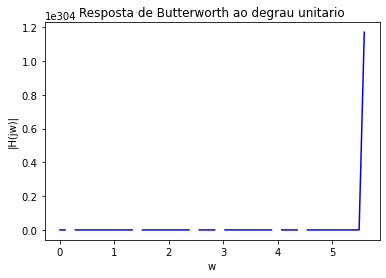

<Figure size 720x360 with 0 Axes>

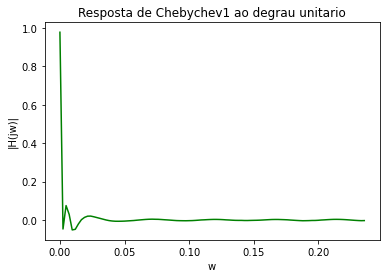

<Figure size 720x360 with 0 Axes>

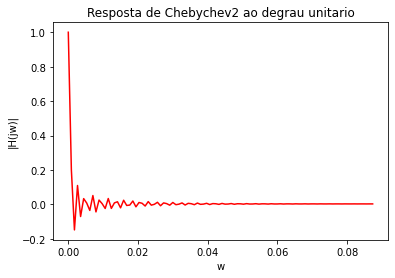

<Figure size 720x360 with 0 Axes>

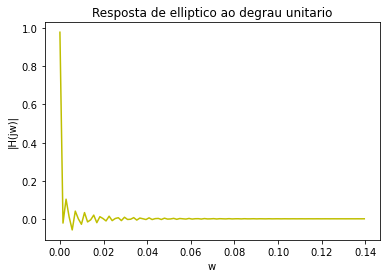

<Figure size 720x360 with 0 Axes>

In [6]:
### SEU CÓDIGO COMEÇA AQUI ###
t,y=signal.step2(filtroButter)
t1,y1=signal.step2(filtrocheby1)
t2,y2=signal.step2(filtrocheby2)
t3,y3=signal.step2(filtroellip)

plt.title("Resposta de Butterworth ao degrau unitario")
plt.ylabel("|H(jw)|")
plt.xlabel("w")
plt.plot(t,y,c='b')
plt.figure(figsize=(10,5))
plt.show()

plt.title("Resposta de Chebychev1 ao degrau unitario")
plt.ylabel("|H(jw)|")
plt.xlabel("w")
plt.plot(t1,y1,c='g')
plt.figure(figsize=(10,5))
plt.show()

plt.title("Resposta de Chebychev2 ao degrau unitario")
plt.ylabel("|H(jw)|")
plt.xlabel("w")
plt.plot(t2,y2,c='r')
plt.figure(figsize=(10,5))
plt.show()

plt.title("Resposta de elliptico ao degrau unitario")
plt.ylabel("|H(jw)|")
plt.xlabel("w")
plt.plot(t3,y3,c='y')
plt.figure(figsize=(10,5))
plt.show()

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico da resposta ao degrau para cada um dos filtros obtidos. O gráfico deve conter quatro curvas, correspondente às aproximações de Butterworth, Chebyshev tipo 1, Chebyshev tipo 2 e Elíptico.
___

### Usando o filtro especificado

Escolha **apenas um** dos filtros obtidos para ser utilizado.
- Crie um sinal aleatório `ur` do tipo ruído branco, com variância elevada
- Filtre o sinal e obtenha um sinal `yr` filtrado
- Mostre, num mesmo gráfico a FFT do sinal antes (`ur`) e após (`yr`) o processo de filtragem

C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=2.6301e-44): result may not be accurate.
  return solve(Q, P)


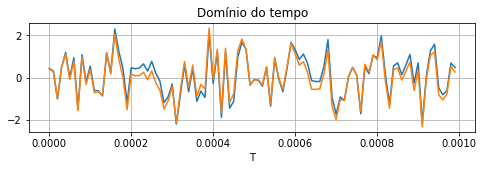

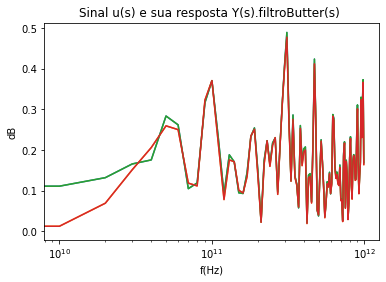

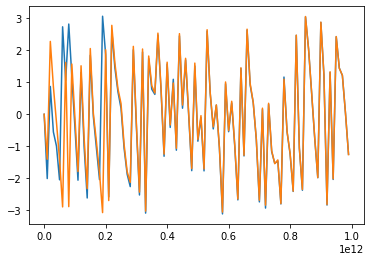

In [7]:
### SEU CÓDIGO COMEÇA AQUI ###
from scipy.fft import fft
periodo=0.00001
tamanhoVetor=100
us=np.random.normal(0,1, tamanhoVetor)
t=np.linspace(0,periodo*tamanhoVetor-periodo,tamanhoVetor)
Tout,Yout,Xout=signal.lsim(filtroellip, us,t)

plt.figure(figsize=(8,2))
plt.title("Domínio do tempo")
plt.grid()
plt.xlabel("T")
plt.plot(t,us)
plt.plot(Tout,Yout)
plt.show();




Nfft = 200



U_f = fft(us, Nfft)
U_f = U_f/tamanhoVetor
U_f[1:] = 2*U_f[1:]
U_f = U_f[:Nfft//2]


f0 = 1/(periodo*periodo)
freqs = np.arange(0.,Nfft*f0,f0)
freqs = freqs[:Nfft//2]
plt.title("Sinal X(s) e sua resposta(Y(s))");
plt.xlabel("f(Hz)")
plt.ylabel("dB")
plt.plot(freqs,np.abs(U_f))
Y_f = fft(Yout, Nfft)
Y_f = Y_f/tamanhoVetor
Y_f[1:] = 2*Y_f[1:]
Y_f = Y_f[:Nfft//2]



plt.plot(freqs,np.abs(Y_f))
freqs = np.arange(0.,Nfft*f0,f0)
freqs = freqs[:Nfft//2]
plt.xscale('log')
plt.title("Sinal u(s) e sua resposta Y(s).filtroButter(s) ");
plt.xlabel("f(Hz)")
plt.ylabel("dB")
plt.plot(freqs,np.abs(U_f))
Y_f = fft(Yout, Nfft)
Y_f = Y_f/tamanhoVetor
Y_f[1:] = 2*Y_f[1:]
Y_f = Y_f[:Nfft//2]

plt.plot(freqs,np.abs(Y_f))
plt.show()

plt.plot(freqs,np.angle(U_f))
plt.plot(freqs,np.angle(Y_f))
### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico de resposta em frequência (módulo e fase) do sinal antes e após passar pelo filtro.
___

### Sinais senoidais
Escolha **apenas um** dos filtros obtidos para ser utilizado.
- Crie um sinal `us` composto por uma soma de cinco senóides de diferentes amplitudes e frequências
- Você escolherá os valores das amplitudes
- As frequências devem ser, obrigatoriamente: 100Hz, 200Hz, 300Hz, 400Hz, 440Hz
- Filtre o sinal `us` e obtenha o sinal de saída `ys`
- Mostre, num mesmo gráfico a FFT do sinal antes (`us`) e após (`ys`) o processo de filtragem

C:\Anaconda\lib\site-packages\scipy\sparse\linalg\matfuncs.py:710: LinAlgWarning: Ill-conditioned matrix (rcond=1.07737e-44): result may not be accurate.
  return solve(Q, P)


___________LEGENDA____________
|Azul:u(s)                    |
|Vermelho: u(s).filtroEllip(s)|
|_____________________________|


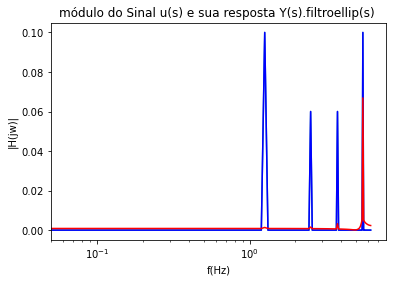

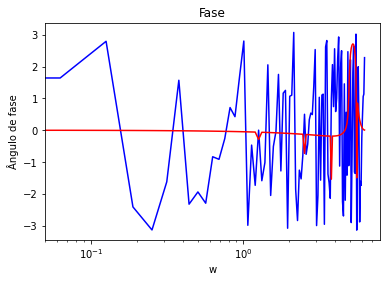

In [8]:
### SEU CÓDIGO COMEÇA AQUI ###
periodo=0.001
tamanhoVetor=100000
w0=2*100*np.pi
f=0

w1=2*200*np.pi
f1=0.5

w2=2*300*np.pi
f2=1

w3=2*440*np.pi
f3=np.pi

t=np.linspace(0,periodo*tamanhoVetor-periodo,tamanhoVetor)
us=50*np.cos(w0*t+f)+30*np.cos(w1*t+f1)+30*np.cos(w2*t+f2)+50*np.cos(w3*t+f3)

Tout,Yout,Xout=signal.lsim(filtroellip, us,t)




Nfft = 200

print("___________LEGENDA____________")
print("|Azul:u(s)                    |")
print("|Vermelho: u(s).filtroEllip(s)|")
print("|_____________________________|")

U_f = fft(us, Nfft)
U_f = U_f/tamanhoVetor
U_f[1:] = 2*U_f[1:]
U_f = U_f[:Nfft//2]

f0 = 2*np.pi/(len(Tout)*periodo)
freqs = np.arange(0.,Nfft*f0,f0)
freqs = freqs[:Nfft//2]
plt.xscale('log')
plt.title("Sinal X(s) e sua resposta(Y(s))");
plt.xlabel("f(Hz)")
plt.ylabel("dB")
plt.plot(freqs,np.abs(U_f))
Y_f = fft(Yout, Nfft)
Y_f = Y_f/tamanhoVetor
Y_f[1:] = 2*Y_f[1:]
Y_f = Y_f[:Nfft//2]


freqs = np.arange(0.,Nfft*f0,f0)
freqs = freqs[:Nfft//2]
plt.xscale('log')
plt.title("módulo do Sinal u(s) e sua resposta Y(s).filtroellip(s) ");
plt.xlabel("f(Hz)")
plt.ylabel("|H(jw)|")
plt.plot(freqs,np.abs(U_f),c='b')
Y_f = fft(Yout, Nfft)
Y_f = Y_f/tamanhoVetor
Y_f[1:] = 2*Y_f[1:]
Y_f = Y_f[:Nfft//2]

plt.plot(freqs,np.abs(Y_f),c='r')
plt.show()

plt.ylabel("Ângulo de fase")
plt.xlabel("w")
plt.title("Fase")
plt.xscale('log')
plt.plot(freqs,np.angle(U_f),c='b')
plt.plot(freqs,np.angle(Y_f),c='r')
### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico de resposta em frequência (módulo e fase) do sinal antes e após passar pelo filtro.
___

## Desafio (não é obrigatório!)

Escolha dois dos filtros obtidos e encontre o circuito ativo que implementa o filtro correspondente, utilizando valores comerciais de componentes (resistores, capacitores, indutores). Implemente o esquemático de um filtro **ativo** e outro filtro **passivo**. Mostre abaixo uma figura com a implementação dos filtros.

`[figura com circuito do filtro ativo]` `[figura com circuito do filtro passivo]`

Na célula abaixo, mostre a resposta em frequência dos filtros implementados (considerando os valores comerciais dos componentes) junto com o gabarito de projeto.

In [9]:
### SEU CÓDIGO COMEÇA AQUI ###
num,den = signal.ellip(2,Ap,Ar, Wn3, 'hp', True,'ba')
print("obtendo funcao de transferencia do filtro de ordem 8 simplificada")
print(num)
print(den)
print("")
print("")

### FIM DO CÓDIGO ###

obtendo funcao de transferencia do filtro de ordem 8 simplificada
[9.77237221e-01 0.00000000e+00 1.02642254e+04]
[1.00000000e+00 2.25528414e+03 3.24068307e+06]


Funcao de transferencia
H(S)=   0.977237221s2+10264.2254
      (___________________________)^3
      s2+ 2255.28414s +3240683.07


Função de transferência

$$ H(s) = (\frac{ 0,977237221 s^2 +10264,2254  }{s^2 +2255,28414s + 3240683,07 })^3 $$



___

# Concluões

Escreva as conclusões deste trabalho, respondendo as seguintes perguntas:
1. Qual filtro teve menor ordem? Por que?
1. Qual filtro teve menor tempo de acomodação na resposta ao degrau?
1. Houve alguma modificação no sinal senoidal `ys` filtrado? Houve alteração significativa na componente espectral de 440Hz? Qual(is) alteração(ões)?
1. Escreva uma ou duas frases sintetizando as principais conclusões desse trabalho.

Neste trabalho, foi possível observar a diferença entre os principais tipos de filtros utilizados. Além disso, pode-se notar a eficácia ao entrar com um sinal que seja uma soma de senoides abaixo da frequência de corte. O quarto impulso, no domínio da , foi o menos atenuado como esperado. Sua distorção deve-se ao fato de estar muito próximo da região de corte.

Bom trabalho :c)